# Predict the variable " Value-Co2-emissions"

### **MODULE IMPORT**

In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
sns.set_style('darkgrid')
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline

### **DATA IMPORT**

In [2]:
path    = 'data/'  # If data in 'data' directory
df = pd.read_csv(path + 'global_data_on_sustainable_energy.csv')
df.head()


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


### **DATA PRE-PROCESSING**
Refining data processing to generate a cleaner and improved dataset for enhanced machine learning outcomes.<br>

Performing below steps:<br>
1. <b>COLUMN RENAMING</b>  - Rewriting column names to create more meaningful and concise labels.<br>
2. <b>COLUMN REMOVER</b>    - Removing un-necessary columns not required for the data analysis.<br>
3. <b>COLUMN NULL</b>    - Immediately handling Null values to ensure smooth data processing.<br>
4. <b>COLUMN DATATYPE</b>  - Converting column types to suitable data types for enhanced operational efficiency.<br>
5. <b>DATA DUPLICATION</b> - Implementing procedures to handle data duplications within the dataset effectively.<br>
6. <b>DATA IMPUTATION</b>  - Addressing the treatment of null, NaN, or None values by mapping and imputing them to appropriate replacement values.<br>
7. <b>DATA STANDARIZATION</b>   - Standardizing data format to enhance data quality.<br>

### <b>4.1. COLUMN RENAMING</b>

<font size="+0.8"><b>Input File Column Names and Features:</b></font>
<ul>
    <br><li><b>Entity</b>: The name of the country or region for which the data is reported.</li>
    <br><li><b>Year</b>: The year for which the data is reported, ranging from 2000 to 2020.</li>
    <br><li><b>Access to electricity (% of population)</b>: The percentage of population with access to electricity.</li>
    <br><li><b>Access to clean fuels for cooking (% of population)</b>: The percentage of the population with primary reliance on clean fuels.</li>
    <br><li><b>Renewable-electricity-generating-capacity-per-capita</b>: Installed Renewable energy capacity per person</li>
    <br><li><b>Financial flows to developing countries (US \$)</b>: Aid and assistance from developed countries for clean energy projects.</li>
    <br><li><b>Renewable energy share in total final energy consumption (%)</b>: Percentage of renewable energy in final energy consumption.</li>
    <br><li><b>Electricity from fossil fuels (TWh)</b>: Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.</li>
    <br><li><b>Electricity from nuclear (TWh)</b>: Electricity generated from nuclear power in terawatt-hours.</li>
    <br><li><b>Electricity from renewables (TWh)</b>: Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.</li>
    <br><li><b>Low-carbon electricity (% electricity)</b>: Percentage of electricity from low-carbon sources (nuclear and renewables).</li>
    <br><li><b>Primary energy consumption per capita (kWh/person)</b>: Energy consumption per person in kilowatt-hours.</li>
    <br><li><b>Energy intensity level of primary energy (MJ/$2011 PPP GDP)</b>: Energy use per unit of GDP at purchasing power parity.</li>
    <br><li><b>Value_co2_emissions (metric tons per capita)</b>: Carbon dioxide emissions per person in metric tons.</li>
    <br><li><b>Renewables (% equivalent primary energy)</b>: Equivalent primary energy that is derived from renewable sources.</li>
    <br><li><b>GDP growth (annual %)</b>: Annual GDP growth rate based on constant local currency.</li>
    <br><li><b>GDP per capita</b>: Gross domestic product per person.</li>
    <br><li><b>Density (P/Km2)</b>: Population density in persons per square kilometer.</li>
    <br><li><b>Land Area (Km2)</b>: Total land area in square kilometers.</li>
    <br><li><b>Latitude</b>: Latitude of the country's centroid in decimal degrees.</li>
    <br><li><b>Longitude</b>: Longitude of the country's centroid in decimal degrees.</li>
</ul>

In [3]:
df.rename(columns={'Entity':'country_name',
                    'Year':'reported_year',
                    'Access to electricity (% of population)':'population_with_power_percentage',
                    'Access to clean fuels for cooking':'population_with_cooking_fuel_percentage',
                    'Renewable-electricity-generating-capacity-per-capita':'renewable_capita',
                    'Financial flows to developing countries (US $)':'foreign_aid_dollar',
                    'Renewable energy share in the total final energy consumption (%)':'renewable_percentage_in_total_consumption',
                    'Electricity from fossil fuels (TWh)':'fossil_power_generate_per_hour',
                    'Electricity from nuclear (TWh)':'nuclear_power_generate_per_hour',
                    'Electricity from renewables (TWh)':'renewable_power_generate_per_hour',
                    'Low-carbon electricity (% electricity)':'decarbonized_power_percentage',
                    'Primary energy consumption per capita (kWh/person)':'per_capita_power',
                    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)':'power_to_gdp',
                    'Value_co2_emissions_kt_by_country':'co2_per_capita',
                    'Renewables (% equivalent primary energy)':'renewable_percentage',
                    'gdp_growth':'gdp_growth',
                    'gdp_per_capita':'gdp_per_capita',
                    'Density\\n(P/Km2)':'population_density',
                    'Land Area(Km2)':'country_area',
                    'Latitude':'country_latitude',
                    'Longitude':'country_longitude'}, inplace=True)

df.head()

,country_name,reported_year,population_with_power_percentage,population_with_cooking_fuel_percentage,renewable_capita,foreign_aid_dollar,renewable_percentage_in_total_consumption,fossil_power_generate_per_hour,nuclear_power_generate_per_hour,renewable_power_generate_per_hour,...,per_capita_power,power_to_gdp,co2_per_capita,renewable_percentage,gdp_growth,gdp_per_capita,population_density,country_area,country_latitude,country_longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [7]:
df.drop(columns='fossil_power_generate_per_hour', inplace=True) # For pedagogic purpose

In [8]:
df.dtypes

country_name                                  object
reported_year                                  int64
population_with_power_percentage             float64
population_with_cooking_fuel_percentage      float64
renewable_capita                             float64
foreign_aid_dollar                           float64
renewable_percentage_in_total_consumption    float64
nuclear_power_generate_per_hour              float64
renewable_power_generate_per_hour            float64
decarbonized_power_percentage                float64
per_capita_power                             float64
power_to_gdp                                 float64
co2_per_capita                               float64
renewable_percentage                         float64
gdp_growth                                   float64
gdp_per_capita                               float64
population_density                            object
country_area                                 float64
country_latitude                             f

In this case, the years follow a sequential order from 2000 to 2020. Therefore, "Year" can be considered a categorical variable with order. This means that the years are not merely labels but represent a progression in time, with each year having a logical and sequential relationship to the previous and subsequent years.

In [9]:
df['country_name']=pd.Categorical(df['country_name'],ordered=False)
df['reported_year']=pd.Categorical(df['reported_year'],ordered=True)
df['population_density']=pd.to_numeric(df['population_density'].str.replace(',', ''), errors='coerce')
df.dtypes

country_name                                 category
reported_year                                category
population_with_power_percentage              float64
population_with_cooking_fuel_percentage       float64
renewable_capita                              float64
foreign_aid_dollar                            float64
renewable_percentage_in_total_consumption     float64
nuclear_power_generate_per_hour               float64
renewable_power_generate_per_hour             float64
decarbonized_power_percentage                 float64
per_capita_power                              float64
power_to_gdp                                  float64
co2_per_capita                                float64
renewable_percentage                          float64
gdp_growth                                    float64
gdp_per_capita                                float64
population_density                            float64
country_area                                  float64
country_latitude            

In [10]:
df.duplicated().sum()

0

In [12]:
missing_rates = df.isna().mean()
missing_rates * 100


country_name                                  0.000000
reported_year                                 0.000000
population_with_power_percentage              0.274048
population_with_cooking_fuel_percentage       4.631406
renewable_percentage_in_total_consumption     5.316525
nuclear_power_generate_per_hour               3.453001
renewable_power_generate_per_hour             0.575500
decarbonized_power_percentage                 1.151000
per_capita_power                              0.000000
power_to_gdp                                  5.672787
co2_per_capita                               11.729241
gdp_growth                                    8.687312
gdp_per_capita                                7.728145
population_density                            0.027405
country_area                                  0.027405
country_latitude                              0.027405
country_longitude                             0.027405
dtype: float64

In [13]:
# The threshold for missing values
threshold = 0.25  # 25%

# Drop columns with missing values exceeding 25%
df.drop(columns=df.columns[missing_rates > threshold], inplace = True)

In [14]:
df=df.dropna() # Delete all individuals which have missing values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2868 entries, 3 to 3647
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   country_name                               2868 non-null   category
 1   reported_year                              2868 non-null   category
 2   population_with_power_percentage           2868 non-null   float64 
 3   population_with_cooking_fuel_percentage    2868 non-null   float64 
 4   renewable_percentage_in_total_consumption  2868 non-null   float64 
 5   nuclear_power_generate_per_hour            2868 non-null   float64 
 6   renewable_power_generate_per_hour          2868 non-null   float64 
 7   decarbonized_power_percentage              2868 non-null   float64 
 8   per_capita_power                           2868 non-null   float64 
 9   power_to_gdp                               2868 non-null   float64 
 10  co2_per_capita   

In [18]:
# Resetting the index to a sequential range
df.reset_index(drop=True, inplace=True)
df.tail()

,country_name,reported_year,population_with_power_percentage,population_with_cooking_fuel_percentage,renewable_percentage_in_total_consumption,nuclear_power_generate_per_hour,renewable_power_generate_per_hour,decarbonized_power_percentage,per_capita_power,power_to_gdp,co2_per_capita,gdp_growth,gdp_per_capita,population_density,country_area,country_latitude,country_longitude
2863,Zimbabwe,2015,33.700000,29.5,80.82,0.0,5.37,57.188496,3860.9202,10.36,12430.00031,1.779873,1445.069702,38.0,390757.0,-19.015438,29.154857
2864,Zimbabwe,2016,42.561730,29.8,81.90,0.0,3.32,48.680350,3227.6802,10.00,11020.00046,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
2865,Zimbabwe,2017,44.178635,29.8,82.46,0.0,4.30,58.503407,3068.0115,9.51,10340.00015,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
2866,Zimbabwe,2018,45.572647,29.9,80.23,0.0,5.46,59.412407,3441.9858,9.83,12380.00011,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857
2867,Zimbabwe,2019,46.781475,30.1,81.50,0.0,4.58,55.582527,3003.6553,10.47,11760.00023,-6.144236,1316.740657,38.0,390757.0,-19.015438,29.154857


### **Unidimensional Statistics**

Kernel density estimation (KDE) in seaborn's histplot function, is an optional parameter that controls whether to overlay a kernel density estimate on top of the histogram.

Kernel density estimation is a non-parametric way to estimate the probability density function of a random variable. It works by placing a kernel (a smooth, symmetric function, such as a Gaussian) at each data point and summing up the contributions from all kernels to estimate the density at any given point.

When **'kde=True'**, seaborn will estimate the kernel density of the data and plot it as a smooth curve over the histogram bars. This curve represents a smoothed version of the underlying distribution of the data.

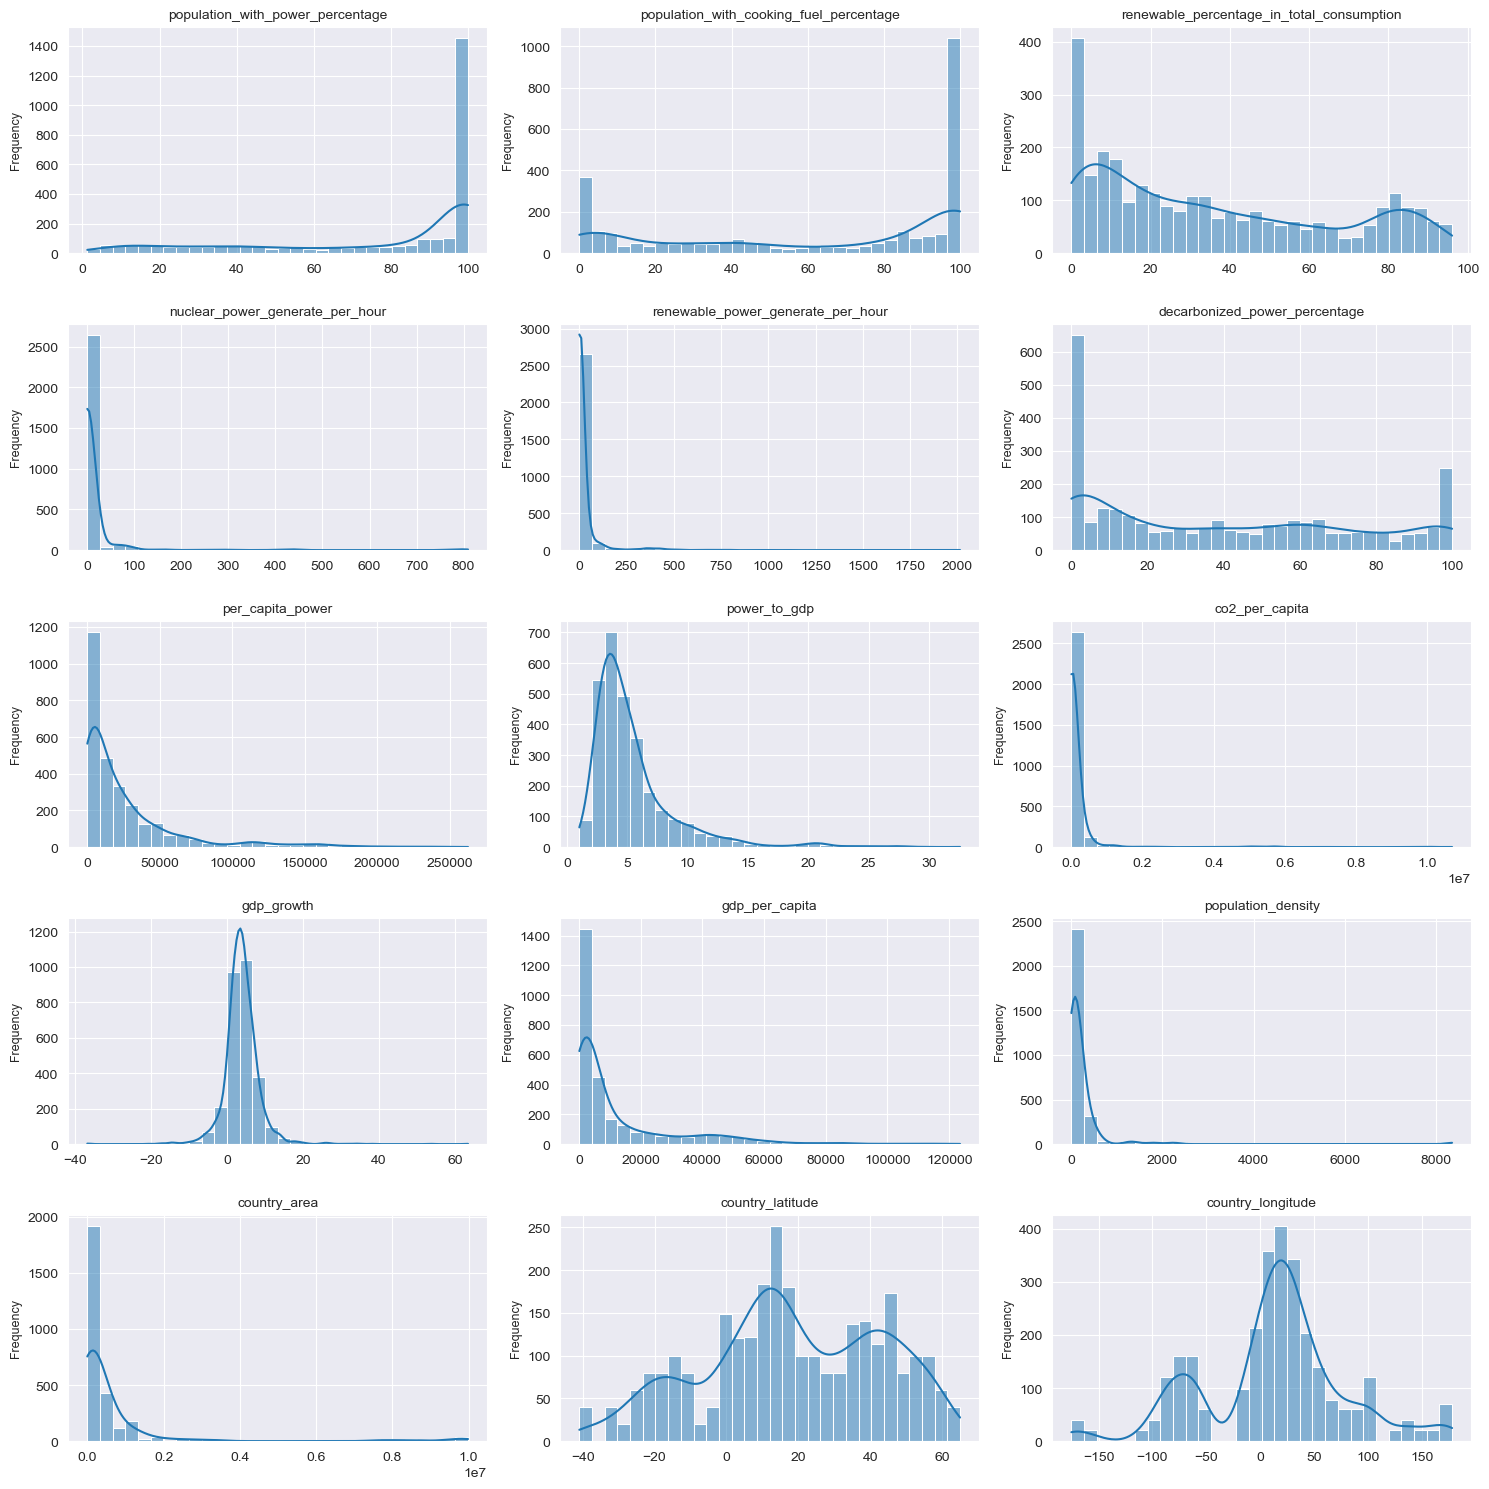

In [24]:
# Filter out the quantitative variables
quantitative_variables = df.select_dtypes(include=['float64']).columns

# Create subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

# Iterate over each quantitative variable and create individual plots
for i, column in enumerate(quantitative_variables):
    sns.histplot(data=df[column], bins = 30, kde=True, ax=axes[i])
    axes[i].set_title(column, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=9)
    axes[i].set_xlabel('')


# Adjust layout
plt.tight_layout()
plt.show()

For most of the variables, which are right-skewed, a logarithmic transformation is often a good choice. However, since logarithms cannot handle zero or negative values, we must account for this before applying the transformation. In cases where the minimum value is zero, we might add a small constant to all values. For variables that already have a roughly normal distribution or are categorical (like gdp_growth), we may not need to apply any transformation.

In [126]:
df_normalized = df.copy()

# List of variables to normalize
variables_to_normalize = [
    'nuclear_power_generate_per_hour',
    'renewable_power_generate_per_hour',
    'per_capita_power',
    'power_to_gdp',
    'co2_per_capita',
    'gdp_per_capita',
    'population_density',
    'country_area'
]

# Apply log transformation to the right-skewed variables
# Adding a small constant (1) to avoid log(0)
for variable in variables_to_normalize:
    df_normalized[f'log_{variable}'] = (df_normalized[variable]).map(lambda x: np.log(x+1))
    df_normalized.drop(columns=variable, inplace=True)

df_normalized.head()

,country_name,reported_year,population_with_power_percentage,population_with_cooking_fuel_percentage,renewable_percentage_in_total_consumption,decarbonized_power_percentage,gdp_growth,country_latitude,country_longitude,log_nuclear_power_generate_per_hour,log_renewable_power_generate_per_hour,log_per_capita_power,log_power_to_gdp,log_co2_per_capita,log_gdp_per_capita,log_population_density,log_country_area
0,Afghanistan,2003,14.738506,9.50,36.66,67.021280,8.832278,33.93911,67.709953,0.0,0.488580,5.442280,0.875469,7.107425,5.255847,4.110874,13.388154
1,Afghanistan,2004,20.064968,10.90,44.24,62.921350,1.414118,33.93911,67.709953,0.0,0.444686,5.324137,0.788457,6.938284,5.358387,4.110874,13.388154
2,Afghanistan,2005,25.390894,12.20,33.88,63.440857,11.229715,33.93911,67.709953,0.0,0.463734,5.533663,0.879627,7.346655,5.493190,4.110874,13.388154
3,Afghanistan,2006,30.718690,13.85,31.89,76.190475,5.357403,33.93911,67.709953,0.0,0.494696,5.721691,0.916291,7.473637,5.578724,4.110874,13.388154
4,Afghanistan,2007,36.051010,15.30,28.78,78.947370,13.826320,33.93911,67.709953,0.0,0.559616,5.872906,0.928219,7.479300,5.888028,4.110874,13.388154


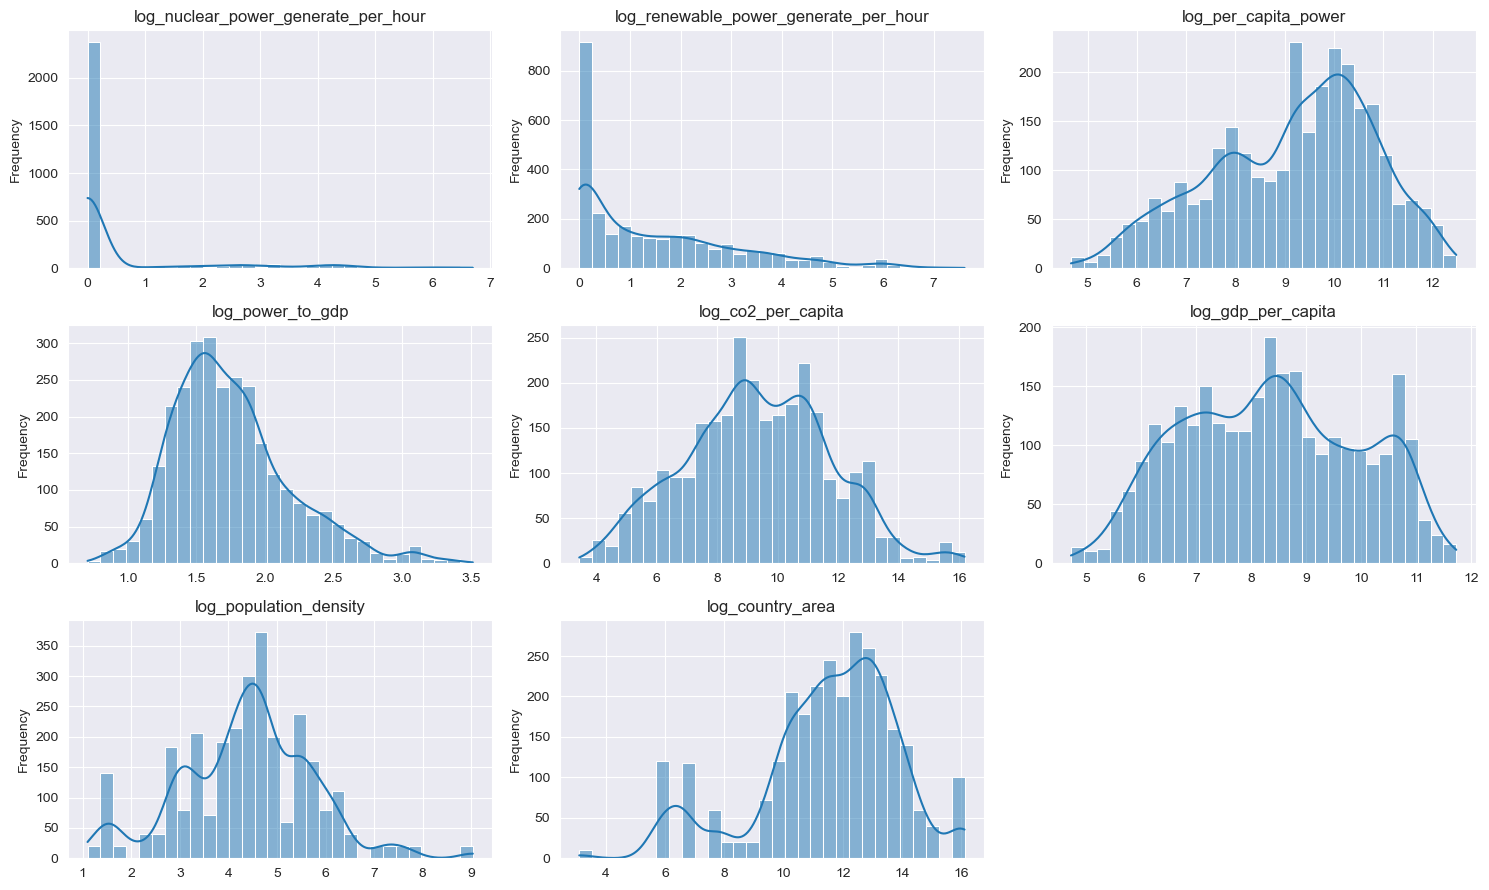

In [127]:
fig, axes = plt.subplots(3, 3, figsize=(15, 9))
axes = axes.flatten()

for i, column in enumerate(variables_to_normalize):
    sns.histplot(data=df_normalized[f'log_{column}'], bins = 30, kde=True, ax=axes[i])
    axes[i].set_title(f'log_{column}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(None)

# Adjust layout
axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

Looking at the histograms of the log-transformed variables, the distributions seem to have improved in terms of symmetry. Log transformations have a way of making right-skewed distributions appear more normal, which is beneficial for many statistical models that assume normally distributed inputs.

From the histograms, ưe have some observations:

1. The **log transformations** have generally helped to centralize the data and reduce skewness, as evidenced by the shapes that are more bell-like than the original distributions.

2. For variables such as `log_co2_per_capita` and `log_per_capita_power`, the log transformation has significantly reduced the right skewness, leading to a more symmetric distribution.

3. Despite the transformation, some variables like `log_nuclear_power_generate_per_hour` and `log_renewable_power_generate_per_hour` still show a concentration of values at the lower end, indicating that these variables have a lot of zero or near-zero values.

4. The variable `log_population_density` shows multiple peaks. This could indicate the presence of subgroups within the data. It might be worth investigating whether there is a categorical variable that segments the data into these subgroups, or whether these represent different population distribution patterns (urban vs. rural, for instance).

5. Some distributions, like `log_country_area`, still have outliers as evidenced by the long tails.

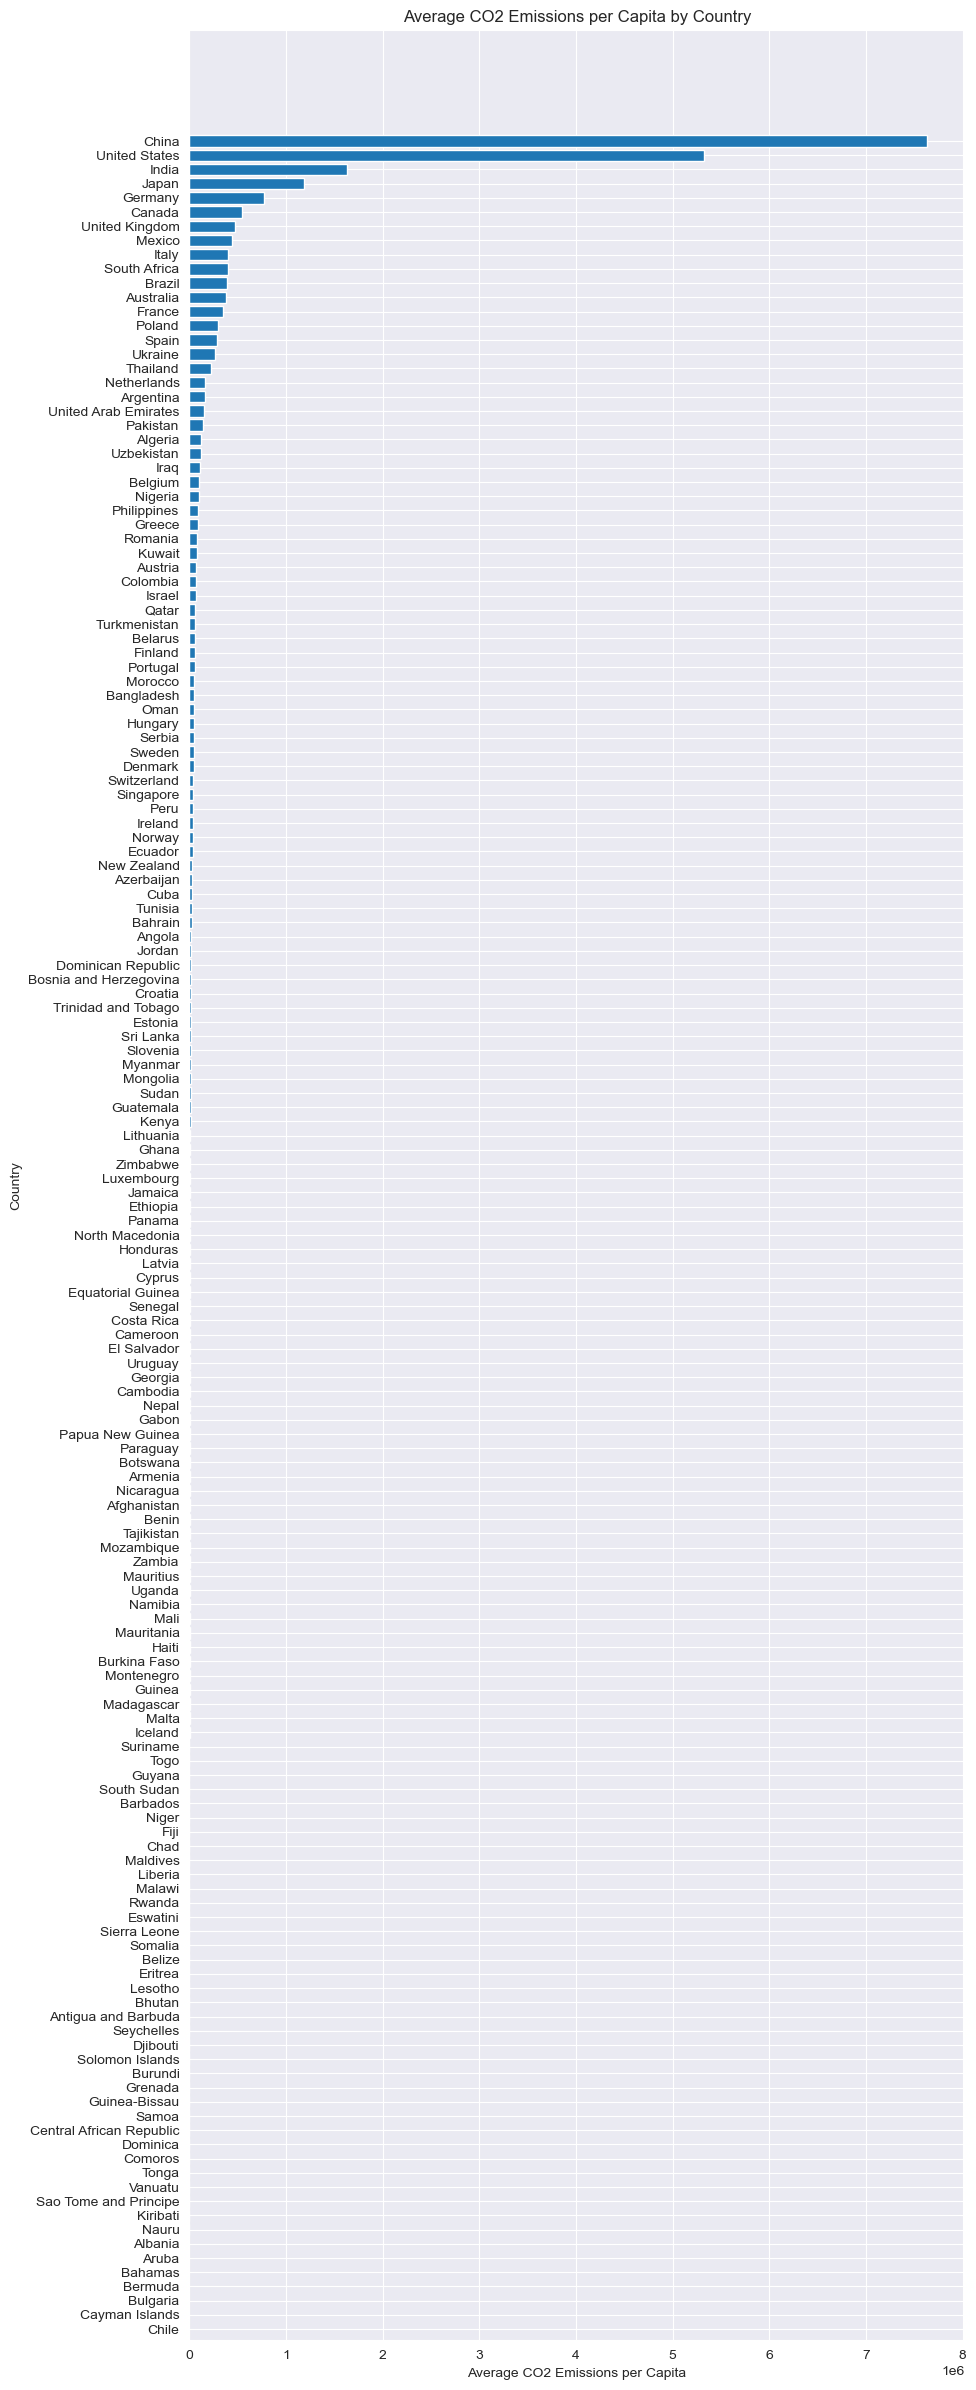

In [129]:
# Tính giá trị trung bình của lượng phát thải CO2 cho mỗi quốc gia
avg_co2_per_country = df.groupby('country_name')['co2_per_capita'].mean().sort_values(ascending=False)

# Trực quan hóa bằng horizontal bar plot với dữ liệu được sắp xếp từ cao xuống thấp
plt.figure(figsize=(10, 30)) 
plt.barh(avg_co2_per_country.index, avg_co2_per_country.values)
plt.title('Average CO2 Emissions per Capita by Country')
plt.xlabel('Average CO2 Emissions per Capita')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Đảo ngược trục y để có giá trị cao ở đầu
plt.show()

country_name
China            7.636642e+06
United States    5.329539e+06
India            1.633979e+06
Japan            1.183734e+06
Germany          7.736445e+05
Name: co2_per_capita, dtype: float64


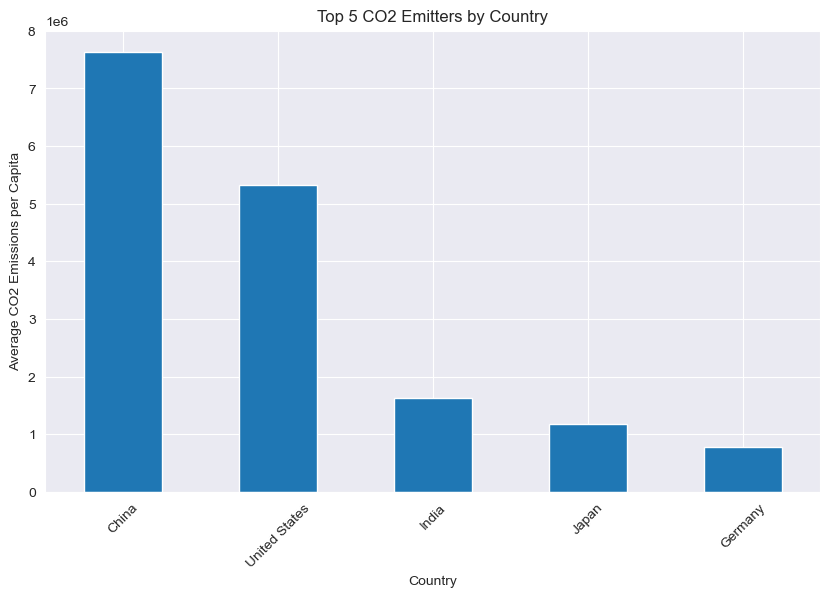

In [130]:
# Lấy ra 5 quốc gia có mức phát thải trung bình cao nhất
top_5_co2_emitters = avg_co2_per_country.head(5)

# In ra 5 quốc gia này
print(top_5_co2_emitters)

# Visualize dữ liệu
plt.figure(figsize=(10, 6))
top_5_co2_emitters.plot(kind='bar')
plt.title('Top 5 CO2 Emitters by Country')
plt.ylabel('Average CO2 Emissions per Capita')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

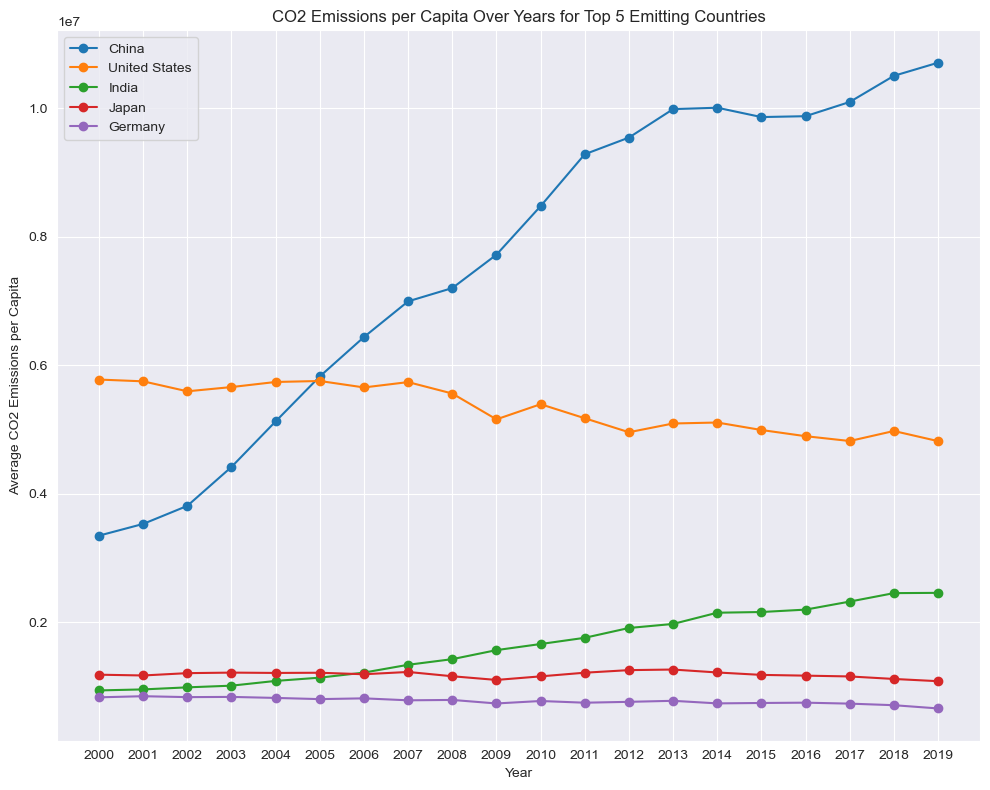

In [131]:
plt.figure(figsize=(10,8))

for country in top_5_co2_emitters.index:
    country_data = df[df['country_name'] == country]
    plt.plot(country_data['reported_year'], country_data['co2_per_capita'], label=country, marker = 'o')

plt.title('CO2 Emissions per Capita Over Years for Top 5 Emitting Countries')
plt.xlabel('Year')
plt.xticks(df['reported_year'].unique())
plt.ylabel('Average CO2 Emissions per Capita')
plt.legend()
plt.tight_layout()
plt.show()

### **Bidimensional Statistics**

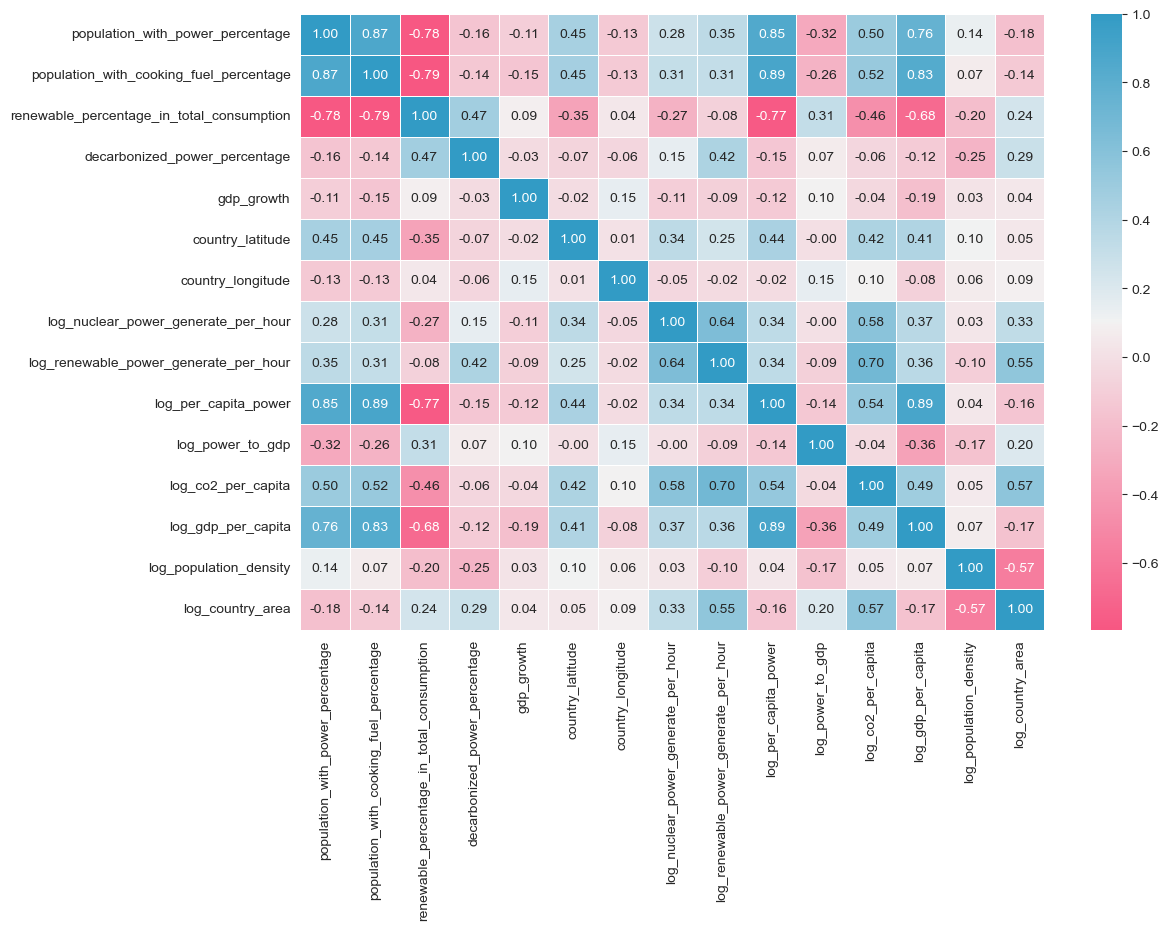

In [132]:
quantitative_variables = df_normalized.select_dtypes(include=['float64']).columns
plt.figure(figsize=(12,8))
# correlation between columns
sns.heatmap(df_normalized[quantitative_variables].corr(), annot=True, fmt='.2f', cmap=cmap, linewidths=.5)
plt.xticks(rotation=90)

plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_normalized[quantitative_variables], alpha=0.2,
               figsize=(15, 15), diagonal='kde')
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(df_normalized[quantitative_variables])
plt.show()

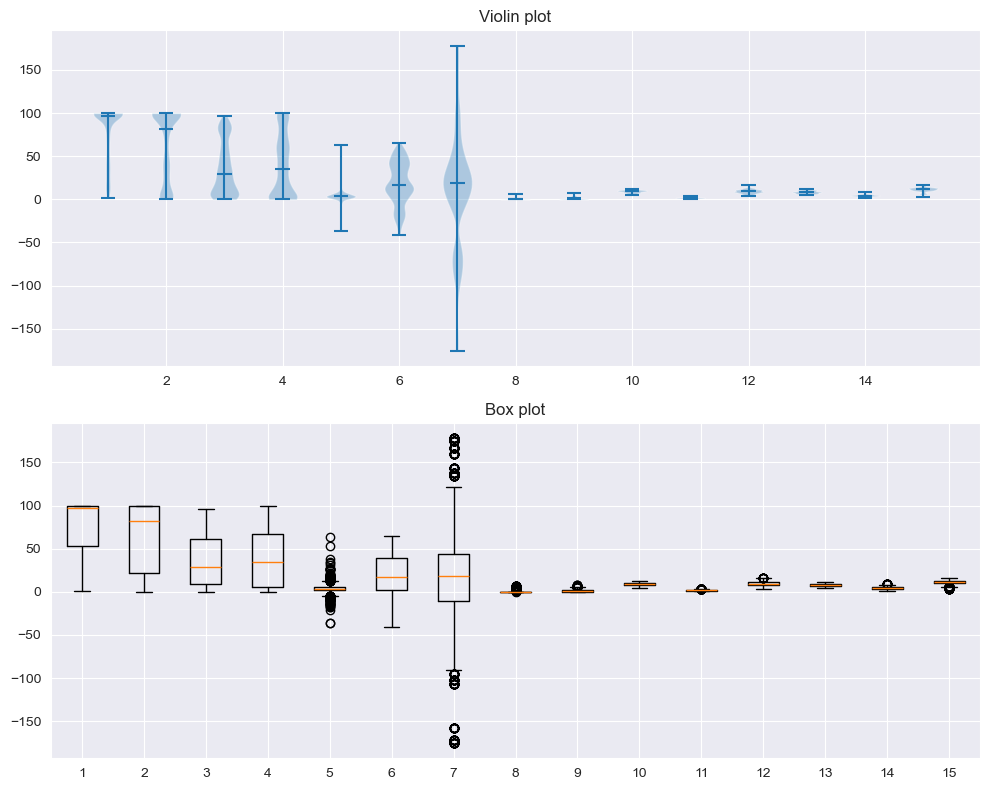

In [136]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# violin plot
axs[0].violinplot(df_normalized[quantitative_variables], showmedians=True)
axs[0].set_title('Violin plot')

# box plot
axs[1].boxplot(df_normalized[quantitative_variables])
axs[1].set_title('Box plot')

plt.tight_layout()
plt.show()

In [137]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
ss = StandardScaler()

# Fit and transform the data
df_scaled = ss.fit_transform(df_normalized[quantitative_variables])

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=quantitative_variables)

df_scaled.head()

,population_with_power_percentage,population_with_cooking_fuel_percentage,renewable_percentage_in_total_consumption,decarbonized_power_percentage,gdp_growth,country_latitude,country_longitude,log_nuclear_power_generate_per_hour,log_renewable_power_generate_per_hour,log_per_capita_power,log_power_to_gdp,log_co2_per_capita,log_gdp_per_capita,log_population_density,log_country_area
0,-1.963065,-1.342539,0.028580,0.795146,1.062898,0.633961,0.836135,-0.411421,-0.636908,-2.257705,-2.033248,-0.932844,-1.961720,-0.200567,0.788733
1,-1.793997,-1.306853,0.281088,0.676131,-0.534190,0.633961,0.836135,-0.411421,-0.664413,-2.329560,-2.234883,-1.003821,-1.896865,-0.200567,0.788733
2,-1.624946,-1.273717,-0.064029,0.691211,1.579053,0.633961,0.836135,-0.411421,-0.652477,-2.202126,-2.023613,-0.832456,-1.811603,-0.200567,0.788733
3,-1.455836,-1.231659,-0.130321,1.061314,0.314777,0.633961,0.836135,-0.411421,-0.633075,-2.087767,-1.938650,-0.779170,-1.757503,-0.200567,0.788733
4,-1.286582,-1.194699,-0.233923,1.141343,2.138087,0.633961,0.836135,-0.411421,-0.592395,-1.995797,-1.911007,-0.776794,-1.561872,-0.200567,0.788733


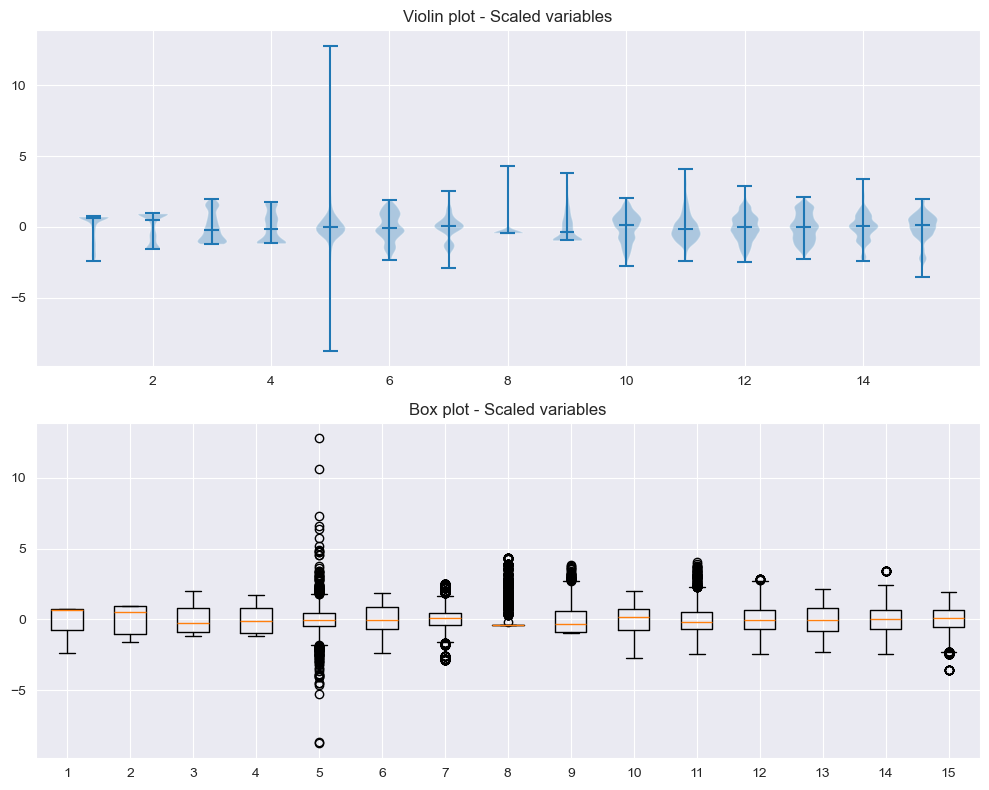

In [138]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# violin plot
axs[0].violinplot(df_scaled, showmedians=True)
axs[0].set_title('Violin plot - Scaled variables')

# box plot
axs[1].boxplot(df_scaled)
axs[1].set_title('Box plot - Scaled variables')

plt.tight_layout()
plt.show()

### **Principal Componants Analysis**

In [139]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

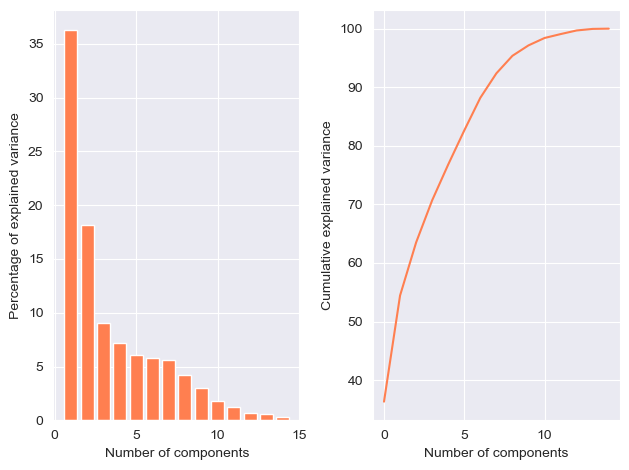

In [140]:
explained_variance_ratio = 100*pca.explained_variance_ratio_

plt.subplot(1,2,1)
n_bars = 14
plt.bar(np.arange(1, n_bars+1), explained_variance_ratio[:n_bars], color='coral')
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")

plt.subplot(1,2,2)
plt.plot(np.cumsum(explained_variance_ratio), color='coral')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt.tight_layout()
plt.show()

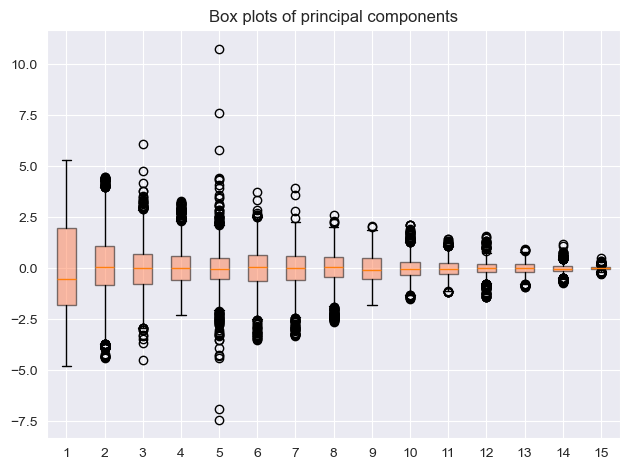

In [141]:
box = plt.boxplot(df_pca, patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of principal components")
plt.tight_layout()
plt.show()